In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [3]:
df = pd.read_csv('E:/MCD/raw data/churn.csv', delimiter = ',')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
df.shape

(5000, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               

In [24]:
day_charge=df["total_day_charge"]
day_charge.head()

0    45.07
1    27.47
2    41.38
3    50.90
4    28.34
Name: total_day_charge, dtype: float64

In [26]:
st.mean(day_charge)

30.649668

In [27]:
st.median(day_charge)

30.62

In [29]:
st.stdev(day_charge)

9.162068691639353

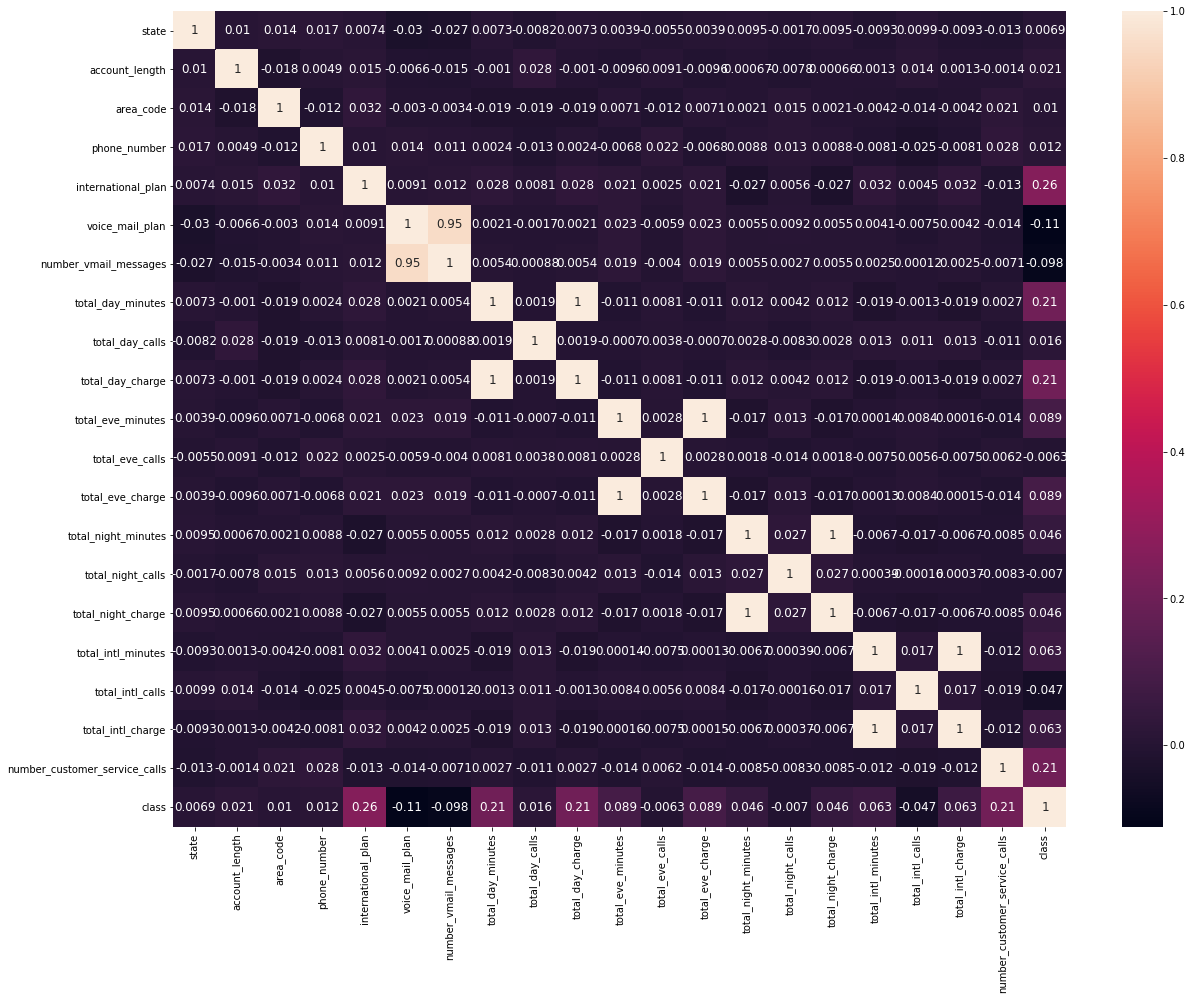

In [12]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25)
 
train_y = train['class']
test_y = test['class']
 
train_x = train
train_x.pop('class')
test_x = test
test_x.pop('class')

2379    0
3882    0
4038    0
3997    0
4432    0
1282    0
4551    0
2043    0
1392    1
4510    0
67      0
2503    0
4020    0
585     0
292     0
2643    0
3848    0
2713    0
2634    0
3700    0
4068    0
224     0
3139    0
546     1
2971    1
4438    0
1285    0
169     0
4723    0
1519    0
       ..
1751    0
3351    0
442     0
1039    0
3439    1
2922    0
662     0
4497    0
1805    0
4163    0
4147    0
779     0
4998    0
1343    0
1684    0
3907    0
4883    0
3459    0
649     1
4975    0
4795    0
3749    0
840     0
1056    0
883     0
1563    0
579     0
1344    1
332     1
229     0
Name: class, Length: 1250, dtype: int64

C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Intercept: [-0.91246775]
Regression: [[-1.99006491e-04 -6.72811466e-04 -7.49501708e-03 -1.20695259e-05
   2.11086706e+00 -6.20166946e-01 -1.39819044e-02  1.30332705e-02
  -2.94681859e-03 -8.76971338e-03  4.09649026e-03 -5.71425051e-03
   3.67023478e-03  2.53060122e-03 -9.53069071e-03 -2.42284117e-03
   1.64136648e-02 -9.19899990e-02  6.42861552e-03  4.24494020e-01]]
Accuracy of logistic regression classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.87      0.98      0.93      1063
           1       0.67      0.19      0.30       187

   micro avg       0.86      0.86      0.86      1250
   macro avg       0.77      0.59      0.61      1250
weighted avg       0.84      0.86      0.83      1250



Text(0.5, 15.0, 'Predicted label')

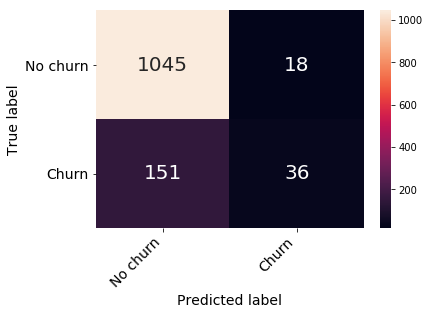

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [23]:
df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64